<a href="https://colab.research.google.com/github/Kzzrll/HMM3/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

#1.Загрузите файл HR.csv в pandas dataframe

In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')
pm = r'/content/drive/My Drive/Notebooks/DZ_itog/'

Mounted at /content/drive/


In [ ]:
f_1 = 'HR.csv'

In [ ]:
df = pd.read_csv(f'{pm}{f_1}', sep = ',')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Проанализировать значения по столбцам

In [ ]:
# Уникальные значения столбцов
print(df['satisfaction_level'].unique())
print(df['last_evaluation'].unique())
print(df['number_project'].unique())
print(df['average_montly_hours'].unique())
print(df['time_spend_company'].unique())
print(df['Work_accident'].unique())
print(df['left'].unique())
print(df['promotion_last_5years'].unique())
print(df['department'].unique())
print(df['salary'].unique())

[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
[2 5 7 6 4 3]
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 2

In [ ]:
# Для числовых столбцов
numeric_result = df.select_dtypes(include='number').apply(pd.Series.value_counts)
numeric_result.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0.00,NaN,NaN,NaN,NaN,NaN,12830.0,11428.0,14680.0
0.09,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.10,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.11,335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.12,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.13,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.14,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.15,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.16,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.17,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Для категориальных столбцов
categorical_result = df.select_dtypes(include='object').apply(pd.Series.value_counts)
categorical_result.head()

,department,salary
IT,1227.0,NaN
RandD,787.0,NaN
accounting,767.0,NaN
high,NaN,1237.0
hr,739.0,NaN


In [ ]:
# Расчитаем пропуски в %
(df.isna().mean() * 100).round(2)

,0
satisfaction_level,0.0
last_evaluation,0.0
number_project,0.0
average_montly_hours,0.0
time_spend_company,0.0
Work_accident,0.0
left,0.0
promotion_last_5years,0.0
department,0.0
salary,0.0


Пропуски отсутствуют

#2.Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

Количественные данные (числовые):

satisfaction_level - непрерывная переменная (0-1)

last_evaluation - непрерывная переменная (0-1)

number_project - дискретная переменная (целое число)

average_montly_hours -  непрерывная переменная

time_spend_company - дискретная переменная (целое число)

Work_accident - бинарная переменная (0/1)

left - бинарная переменная (0/1)

promotion_last_5years - бинарная переменная (0/1)

Категориальные данные:

department - номинальная переменная

salary - порядковая переменная (low, medium, high)


Основные базовые статистики

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Столбец 'satisfaction_level'. Уровень удовлетворенности работой. Непрерывная переменная (0-1).

In [ ]:
df["satisfaction_level"].describe()

,satisfaction_level
count,14999.000000
mean,0.612834
std,0.248631
min,0.090000
25%,0.440000
50%,0.640000
75%,0.820000
max,1.000000


In [ ]:
#Мода
print('Мода:', df['satisfaction_level'].mode()[0])
# Квартили
q25_satisfaction_level = df['satisfaction_level'].quantile(0.25)
q50_satisfaction_level = df['satisfaction_level'].quantile(0.50)  # медиана
q75_satisfaction_level = df['satisfaction_level'].quantile(0.75)
iqr_satisfaction_level = q75_satisfaction_level - q25_satisfaction_level  # межквартильный размах
print('Межквартильный размах:', iqr_satisfaction_level)
# Дополнительные характеристики
print('Дисперсия:', df['satisfaction_level'].var())# дисперсия
print('Асимметрия:', df['satisfaction_level'].skew())  # асимметрия
print('Эксцесс:', df['satisfaction_level'].kurtosis())  # эксцесс


Мода: 0.1
Межквартильный размах: 0.37999999999999995
Дисперсия: 0.061817200647087255
Асимметрия: -0.4763603412839644
Эксцесс: -0.6708586220574557


График.

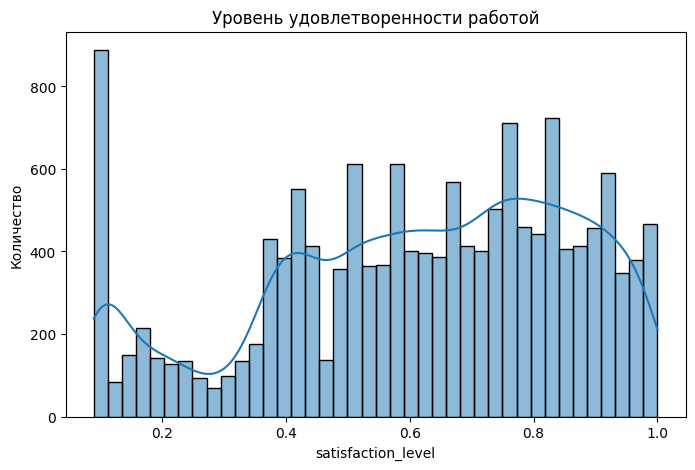

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x="satisfaction_level", bins=40, kde=True)
plt.title("Уровень удовлетворенности работой")
plt.ylabel("Количество")
plt.show()

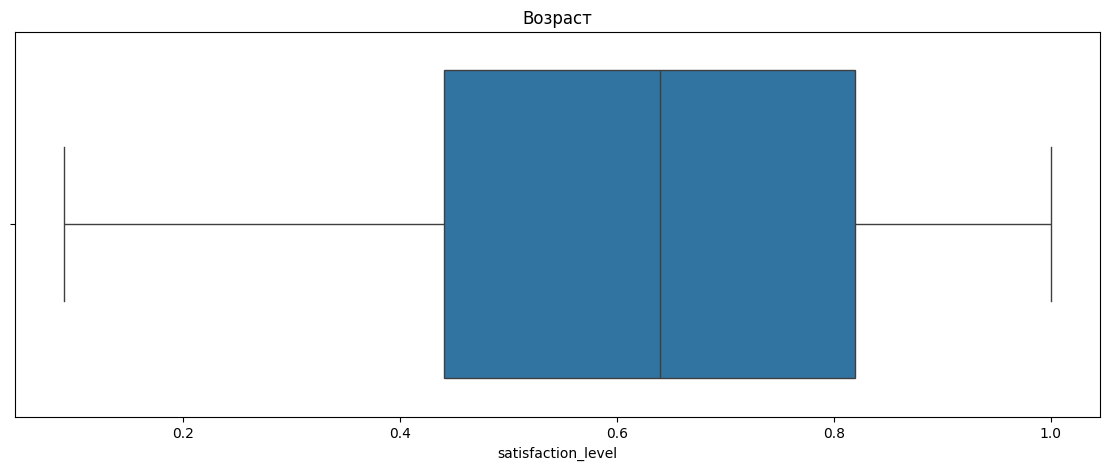

In [ ]:
plt.figure(figsize=[14,5])
sns.boxplot(data=df, x='satisfaction_level')
plt.title("Возраст")
plt.show()

Выбросы отсутствуют.

Столбец Last_evaluation. Время с момента последней оценки в годах. Непрерывная переменная (0-1)

In [ ]:
df["last_evaluation"].describe()

,last_evaluation
count,14999.000000
mean,0.716102
std,0.171169
min,0.360000
25%,0.560000
50%,0.720000
75%,0.870000
max,1.000000


In [ ]:
#Мода
print('Мода:', df['last_evaluation'].mode()[0])
# Квартили
q25_last_evaluation = df['last_evaluation'].quantile(0.25)
q50_last_evaluation = df['last_evaluation'].quantile(0.50)  # медиана
q75_last_evaluation = df['last_evaluation'].quantile(0.75)
iqr_last_evaluation = q75_last_evaluation - q25_last_evaluation  # межквартильный размах
print('Межквартильный размах:', iqr_last_evaluation)
# Дополнительные характеристики
print('Дисперсия:', df['last_evaluation'].var())# дисперсия
print('Асимметрия:', df['last_evaluation'].skew())  # асимметрия
print('Эксцесс:', df['last_evaluation'].kurtosis())  # эксцесс

Мода: 0.55
Межквартильный размах: 0.30999999999999994
Дисперсия: 0.02929886443156327
Асимметрия: -0.02662174986376086
Эксцесс: -1.2390402819304127


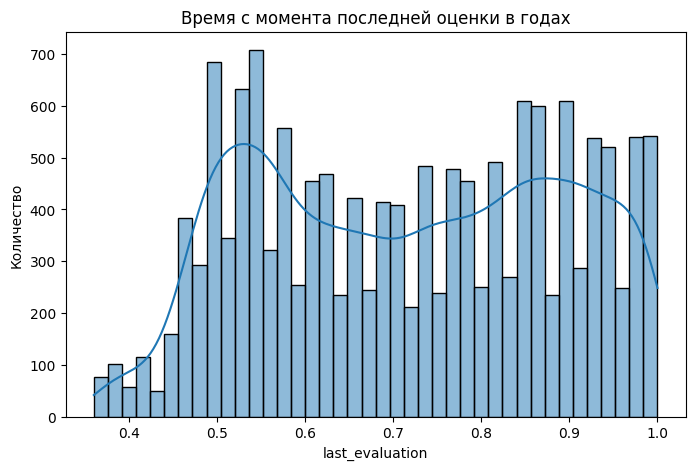

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x="last_evaluation", bins=40, kde=True)
plt.title("Время с момента последней оценки в годах")
plt.ylabel("Количество")
plt.show()

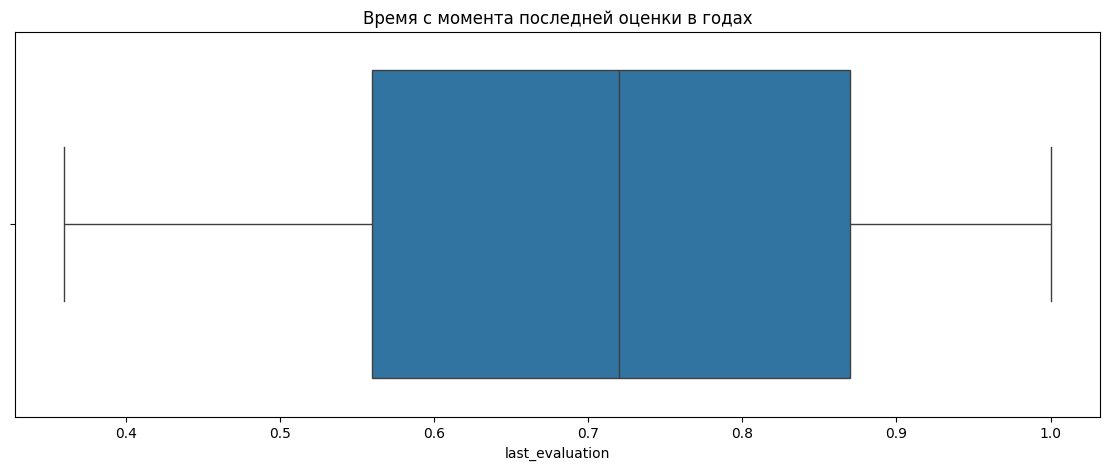

In [ ]:
plt.figure(figsize=[14,5])
sns.boxplot(data=df, x='last_evaluation')
plt.title("Время с момента последней оценки в годах")
plt.show()

Выбросы отсутствуют.

Столбец number_project. Количество проектов, выполненных за время работы. Дискретная переменная (целое число)

In [ ]:
df["number_project"].value_counts(normalize = True)

,proportion
number_project,
4,0.291019
3,0.270351
5,0.184079
2,0.159211
6,0.078272
7,0.017068


График

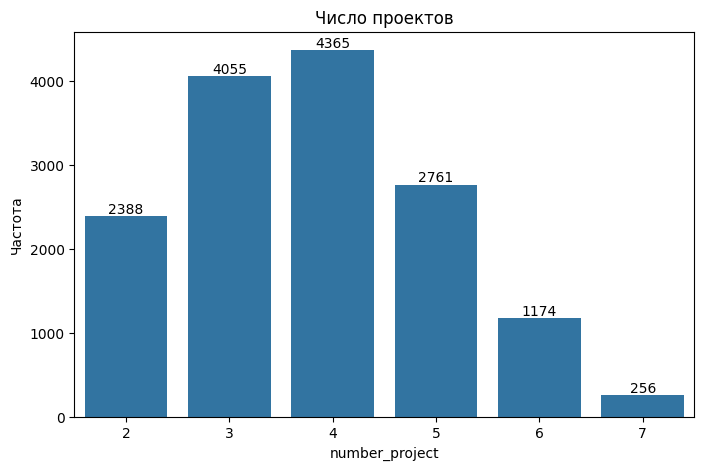

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df, x="number_project")
ax.bar_label(ax.containers[0])
plt.title("Число проектов")
plt.ylabel("Частота")
plt.show()

Столбец average_montly_hours. Среднее количество часов на рабочем месте в месяц. Неприрывная величина

In [ ]:
df["average_montly_hours"].describe()

,average_montly_hours
count,14999.000000
mean,201.050337
std,49.943099
min,96.000000
25%,156.000000
50%,200.000000
75%,245.000000
max,310.000000


In [ ]:
#Мода
print('Мода:', df['average_montly_hours'].mode()[0])
# Квартили
q25_average_montly_hours = df['average_montly_hours'].quantile(0.25)
q50_average_montly_hours = df['average_montly_hours'].quantile(0.50)  # медиана
q75_average_montly_hours = df['average_montly_hours'].quantile(0.75)
iqr_average_montly_hours = q75_average_montly_hours - q25_average_montly_hours  # межквартильный размах
print('Межквартильный размах:', iqr_average_montly_hours)
# Дополнительные характеристики
print('Дисперсия:', df['average_montly_hours'].var())# дисперсия
print('Асимметрия:', df['average_montly_hours'].skew())  # асимметрия
print('Эксцесс:', df['average_montly_hours'].kurtosis())  # эксцесс

Мода: 135
Межквартильный размах: 89.0
Дисперсия: 2494.313174809979
Асимметрия: 0.0528419894163242
Эксцесс: -1.1349815681924558


График

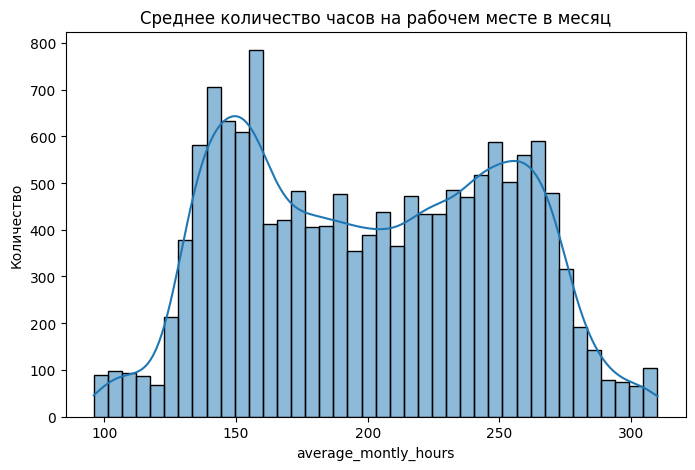

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x="average_montly_hours", bins=40, kde=True)
plt.title("Среднее количество часов на рабочем месте в месяц")
plt.ylabel("Количество")
plt.show()

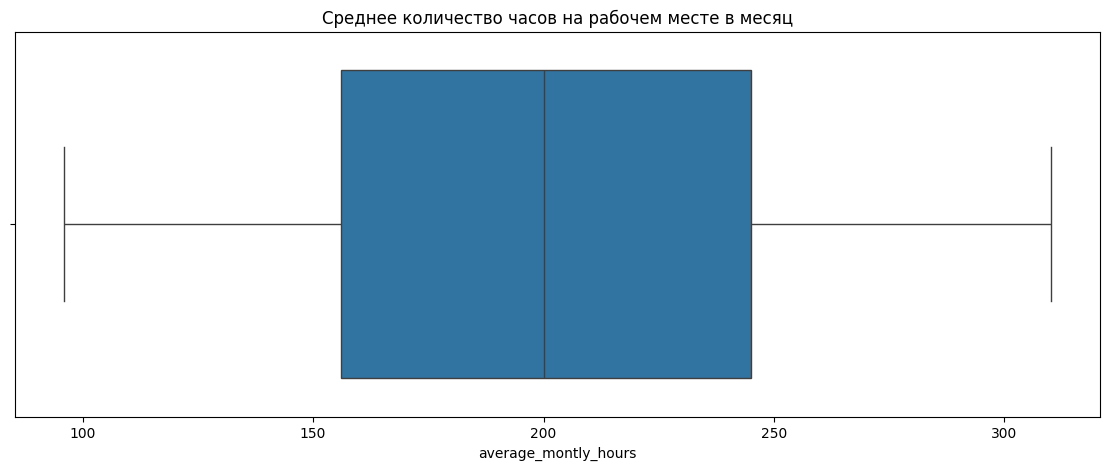

In [ ]:
plt.figure(figsize=[14,5])
sns.boxplot(data=df, x='average_montly_hours')
plt.title("Среднее количество часов на рабочем месте в месяц")
plt.show()

Выбросы отсутствуют.

Столбец time_spend_company. Стаж работы. Дискретные данные.

In [ ]:
df["time_spend_company"].value_counts(normalize = True)

,proportion
time_spend_company,
3,0.429562
2,0.216281
4,0.170478
5,0.098207
6,0.047870
10,0.014268
7,0.012534
8,0.010801


График

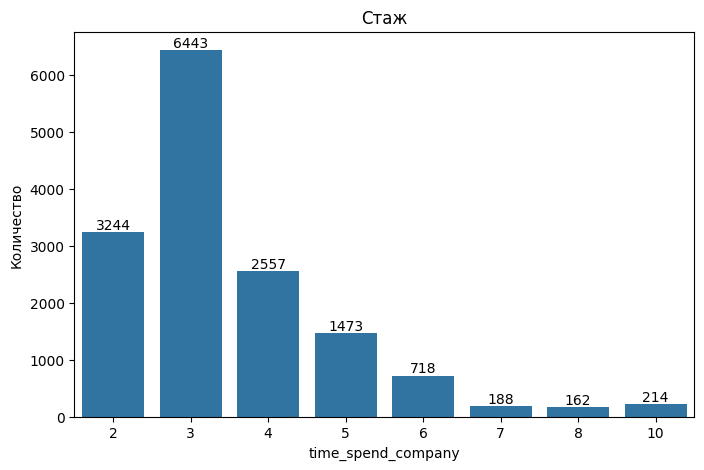

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df, x="time_spend_company")
ax.bar_label(ax.containers[0])
plt.title("Стаж")
plt.ylabel("Количество")
plt.show()

Столбец work_accident. Происходили ли несчастные случаи на рабочем месте с сотрудником.Дискретные данные.

In [ ]:
df["Work_accident"].value_counts(normalize = True)

,proportion
Work_accident,
0,0.85539
1,0.14461


График

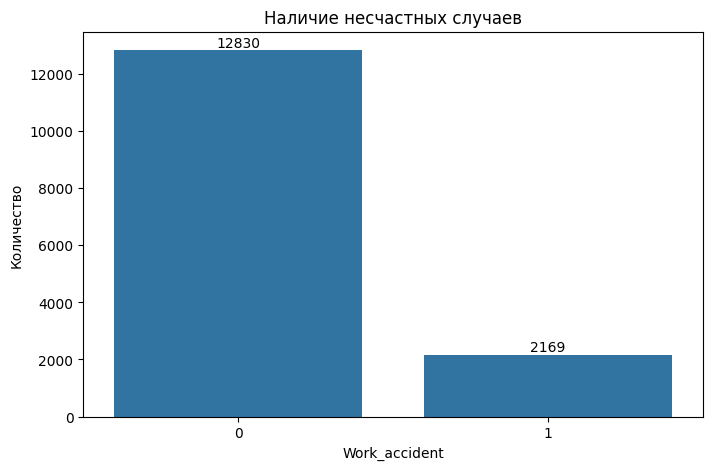

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df, x="Work_accident")
ax.bar_label(ax.containers[0])
plt.title("Наличие несчастных случаев")
plt.ylabel("Количество")
plt.show()

Столбец left. Уволился ли сотрудник. Дискретные данные.

In [ ]:
df["left"].value_counts(normalize = True)

,proportion
left,
0,0.761917
1,0.238083


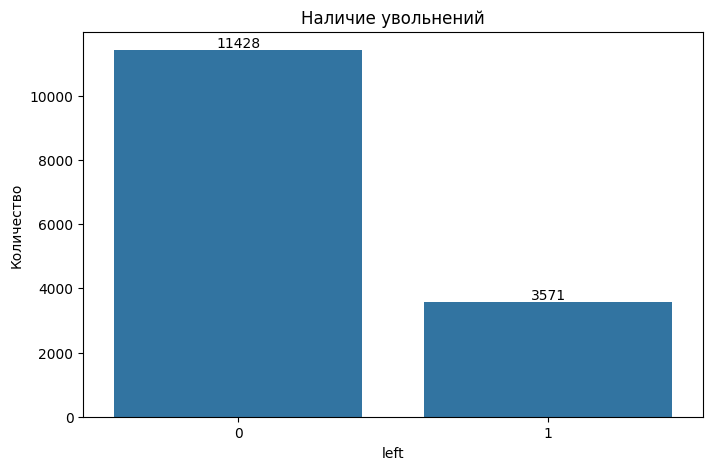

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df, x="left")
ax.bar_label(ax.containers[0])
plt.title("Наличие увольнений")
plt.ylabel("Количество")
plt.show()

Столбец promotion_last_5years. Повышался ли сотрудник за последние пять лет. Дискретные данные.

In [ ]:
df["promotion_last_5years"].value_counts(normalize = True)

,proportion
promotion_last_5years,
0,0.978732
1,0.021268


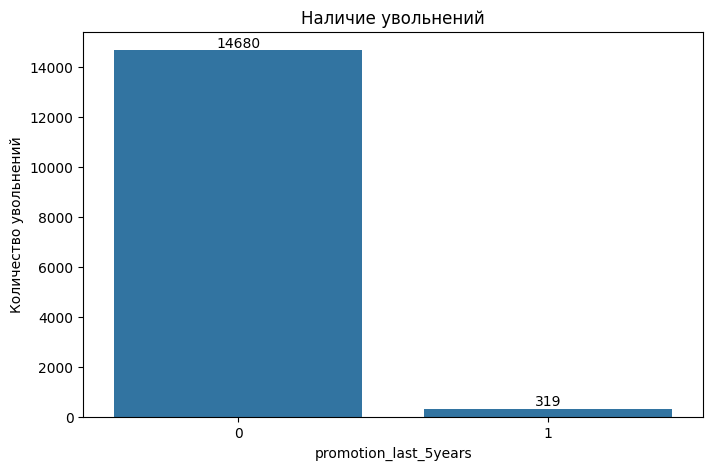

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df, x="promotion_last_5years")
ax.bar_label(ax.containers[0])
plt.title("Наличие увольнений")
plt.ylabel("Количество увольнений")
plt.show()

Столбец department. Отдел в котором работает сотрудник. Дискретные данные.


In [ ]:
df["department"].value_counts(normalize = True)

,proportion
department,
sales,0.276018
technical,0.181345
support,0.148610
IT,0.081805
product_mng,0.060137
marketing,0.057204
RandD,0.052470
accounting,0.051137
hr,0.049270


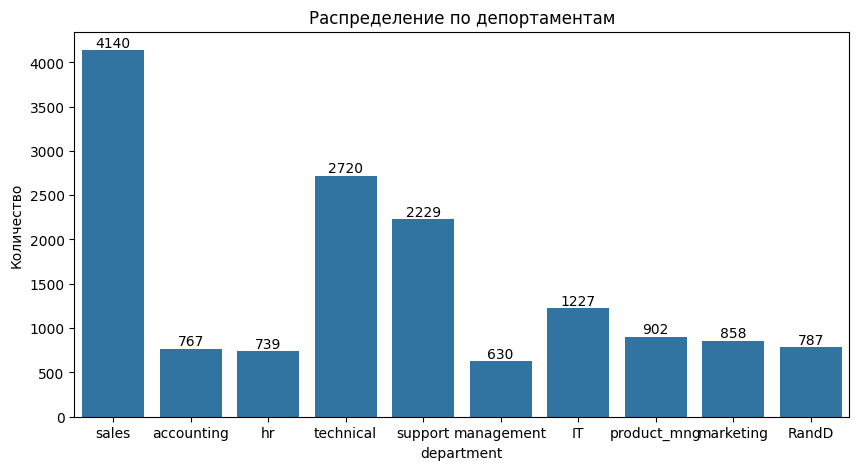

In [ ]:
plt.figure(figsize=[10,5])
ax = sns.countplot(data=df, x="department")
ax.bar_label(ax.containers[0])
plt.title("Распределение по депортаментам")
plt.ylabel("Количество")
plt.show()

Столбец salary - относительный уровень зарплаты. Дискретные данные.


In [ ]:
df["salary"].value_counts(normalize = True)

,proportion
salary,
low,0.487766
medium,0.429762
high,0.082472


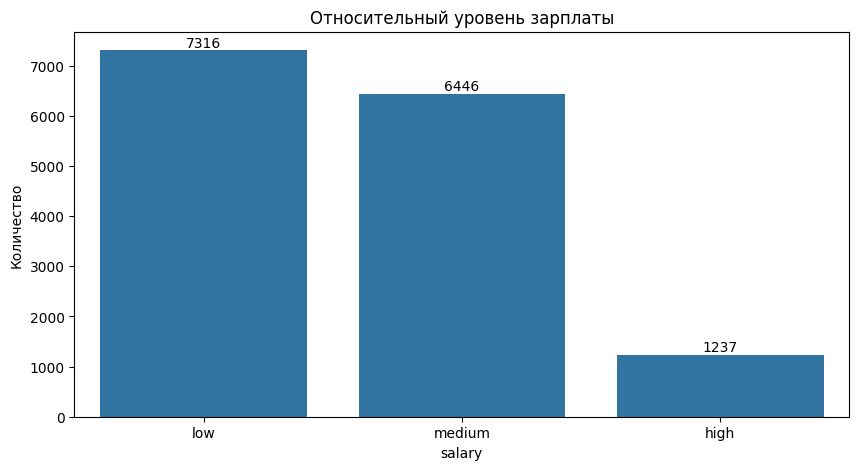

In [ ]:
plt.figure(figsize=[10,5])
ax = sns.countplot(data=df, x="salary")
ax.bar_label(ax.containers[0])
plt.title("Относительный уровень зарплаты")
plt.ylabel("Количество")
plt.show()

#3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.


In [ ]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.9 MB/s eta 0:00:00


In [ ]:
phik_overview = df.phik_matrix(interval_cols=['satisfaction_level','last_evaluation','average_montly_hours'])
phik_overview

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.524186,0.671192,0.632964,0.434504,0.126103,0.794751,0.048870,0.077827,0.103511
last_evaluation,0.524186,1.000000,0.405454,0.423943,0.277426,0.060155,0.445802,0.062559,0.065680,0.076748
number_project,0.671192,0.405454,1.000000,0.520013,0.418083,0.127437,0.793722,0.042565,0.044844,0.156156
average_montly_hours,0.632964,0.423943,0.520013,1.000000,0.327967,0.089761,0.572472,0.017737,0.099999,0.082845
time_spend_company,0.434504,0.277426,0.418083,0.327967,1.000000,0.089437,0.497255,0.192891,0.167530,0.150826
Work_accident,0.126103,0.060155,0.127437,0.089761,0.089437,1.000000,0.239838,0.059210,0.030992,0.000000
left,0.794751,0.445802,0.793722,0.572472,0.497255,0.239838,1.000000,0.095205,0.093995,0.096011
promotion_last_5years,0.048870,0.062559,0.042565,0.017737,0.192891,0.059210,0.095205,1.000000,0.197001,0.059505
department,0.077827,0.065680,0.044844,0.099999,0.167530,0.030992,0.093995,0.197001,1.000000,0.245498
salary,0.103511,0.076748,0.156156,0.082845,0.150826,0.000000,0.096011,0.059505,0.245498,1.000000


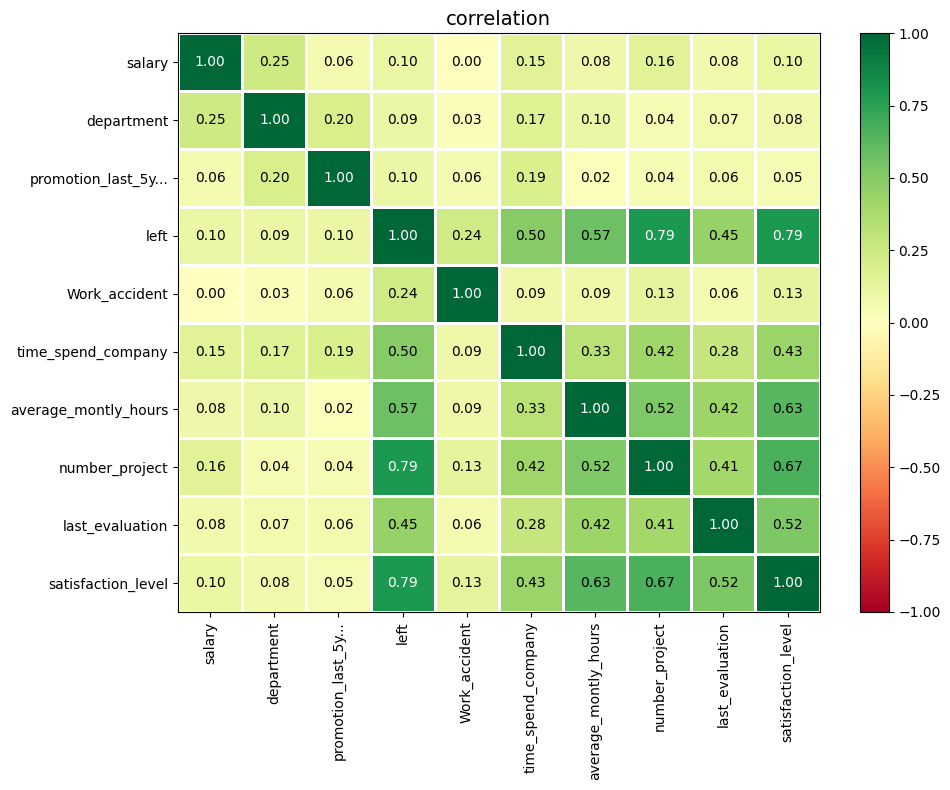

In [ ]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))

Две самые скоррелированные переменные: left и satisfaction_level - 0.79, left и number_projects  - 0.79

две самые скоррелированные и две наименее скоррелированные переменные: 	department и number_projects -0.04,  department и work_accident - 0.03

#4.Рассчитайте сколько сотрудников работает в каждом департаменте.


In [ ]:
df.groupby('department')['department'].count()

,department
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


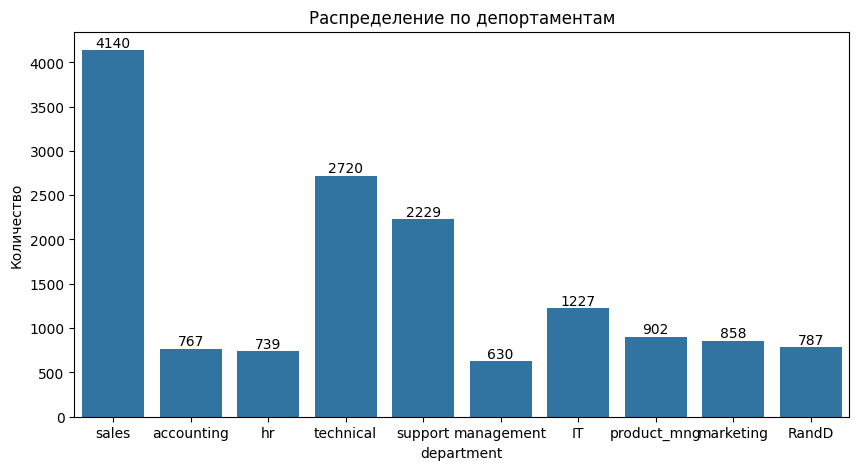

In [ ]:
plt.figure(figsize=[10,5])
ax = sns.countplot(data=df, x="department")
ax.bar_label(ax.containers[0])
plt.title("Распределение по депортаментам")
plt.ylabel("Количество")
plt.show()

#5.Показать распределение сотрудников по зарплатам.

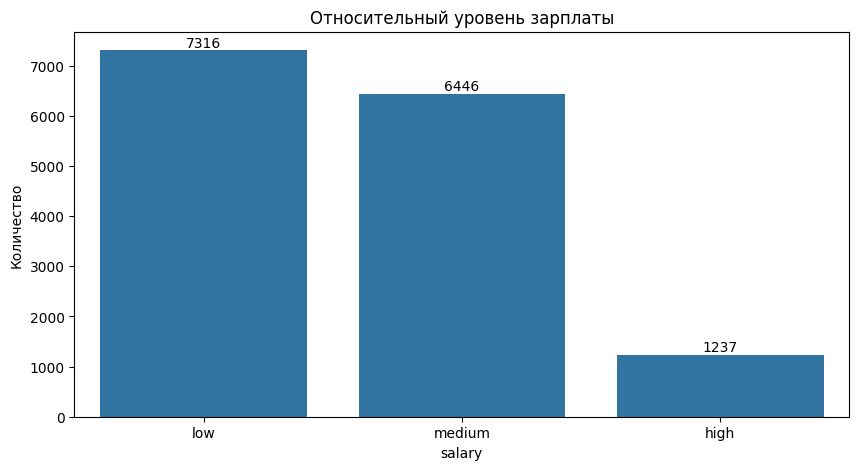

In [ ]:
plt.figure(figsize=[10,5])
ax = sns.countplot(data=df, x="salary")
ax.bar_label(ax.containers[0])
plt.title("Относительный уровень зарплаты")
plt.ylabel("Количество")
plt.show()

#6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
df_r = df.groupby([df['department'],df['salary']])[['salary']].count()
df_r

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<Axes: ylabel='department,salary'>

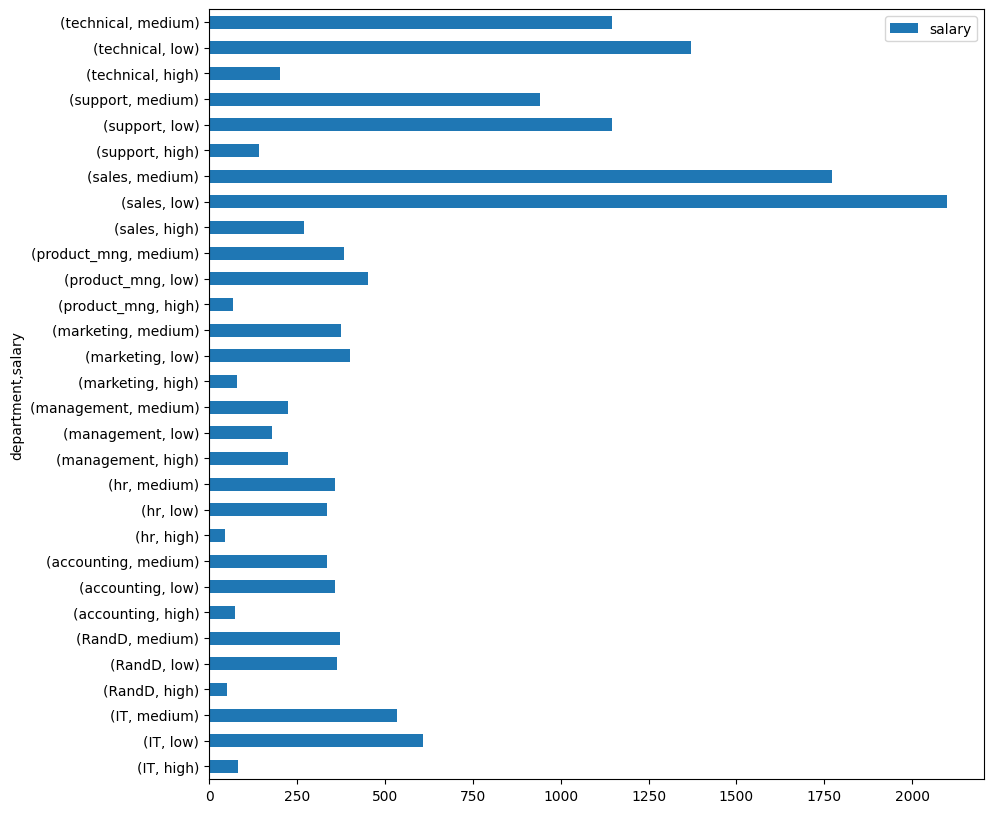

In [ ]:
df_r.plot(kind="barh",figsize=(10,10))

#7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [ ]:
# Фильтруем данные по зарплате
low_salary = df[df['salary'] == 'low']['average_montly_hours']
high_salary = df[df['salary'] == 'medium']['average_montly_hours']

# Проверяем нормальность распределения для каждой группы
norm_low = stats.shapiro(low_salary)
norm_high = stats.shapiro(high_salary)

# Проверяем равенство дисперсий
levene_test = stats.levene(low_salary, high_salary)

# Если данные нормально распределены и дисперсии равны, используем t-тест
if norm_low.pvalue > 0.05 and norm_high.pvalue > 0.05 and levene_test.pvalue > 0.05:
    result = stats.ttest_ind(low_salary, high_salary, equal_var=True)
    print("Используем t-тест для независимых выборок")
    print(f"p-value: {result.pvalue}")
    print(f"Средняя продолжительность работы для low: {low_salary.mean()}")
    print(f"Средняя продолжительность работы для high: {high_salary.mean()}")

# Если данные не соответствуют нормальному распределению или дисперсии неравны, используем U-критерий Манна-Уитни
else:
    result = stats.mannwhitneyu(low_salary, high_salary, alternative='two-sided')
    print("Используем U-критерий Манна-Уитни")
    print(f"p-value: {result.pvalue}")
    print(f"Средняя продолжительность работы для low: {low_salary.mean()}")
    print(f"Средняя продолжительность работы для high: {high_salary.mean()}")

# Вывод результатов
if result.pvalue < 0.05:
    print("Гипотеза о различии подтверждается")
else:
    print("Гипотеза о различии не подтверждается")

Используем U-критерий Манна-Уитни
p-value: 0.5406117847989235
Средняя продолжительность работы для low: 200.9965828321487
Средняя продолжительность работы для high: 201.33834936394663
Гипотеза о различии не подтверждается


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7316.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6446.
  res = hypotest_fun_out(*samples, **kwds)


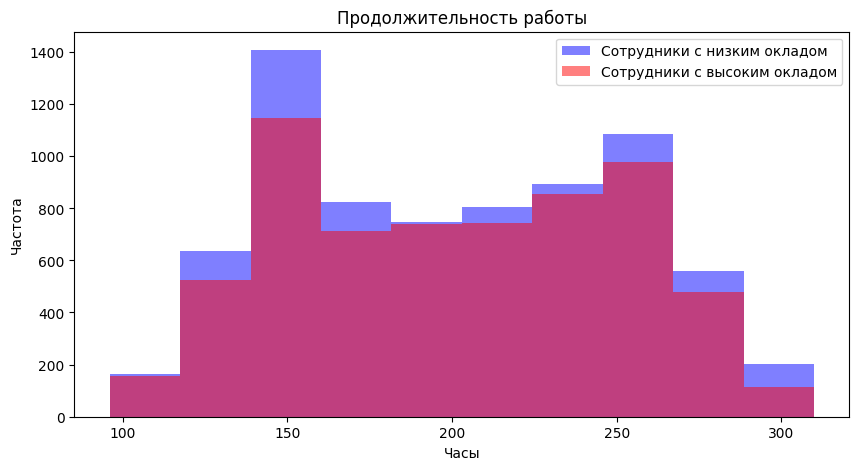

In [ ]:
# Визуализация данных
plt.figure(figsize=(10, 5))
plt.hist(low_salary, bins=10, alpha=0.5, label='Cотрудники с низким окладом', color='blue')
plt.hist(high_salary, bins=10, alpha=0.5, label='Cотрудники с высоким окладом', color='red')
plt.legend()
plt.title('Продолжительность работы')
plt.xlabel('Часы')
plt.ylabel('Частота')
plt.show()

Графический анализ подтверждает, гипотеза о различии не подтверждается.

#8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов








In [ ]:
# Разделяем данные на уволившихся и не уволившихся
left_employees = df[df['left'] == 1]
stayed_employees = df[df['left'] == 0]

# Рассчитываем долю сотрудников с повышением за последние 5 лет
def calculate_promotion_share(group):
    if len(group) == 0:
        return 0.0
    return (group['promotion_last_5years'].sum() / len(group)) * 100

# Рассчитываем для уволившихся
left_promotion_share = calculate_promotion_share(left_employees)

# Рассчитываем для оставшихся
stayed_promotion_share = calculate_promotion_share(stayed_employees)

# Выводим результаты
print(f"Доля уволившихся сотрудников с повышением за последние 5 лет: {left_promotion_share:.2f}%")
print(f"Доля оставшихся сотрудников с повышением за последние 5 лет: {stayed_promotion_share:.2f}%")

Доля уволившихся сотрудников с повышением за последние 5 лет: 0.53%
Доля оставшихся сотрудников с повышением за последние 5 лет: 2.63%


In [ ]:
# Рассчитываем среднюю степень удовлетворенности
mean_satisfaction_left = left_employees['satisfaction_level'].mean()
mean_satisfaction_stayed = stayed_employees['satisfaction_level'].mean()

# Выводим результаты
print(f"Средняя степень удовлетворенности уволившихся сотрудников: {mean_satisfaction_left:.2f}")
print(f"Средняя степень удовлетворенности оставшихся сотрудников: {mean_satisfaction_stayed:.2f}")

Средняя степень удовлетворенности уволившихся сотрудников: 0.44
Средняя степень удовлетворенности оставшихся сотрудников: 0.67


In [ ]:
# Рассчитываем среднее количество проектов
mean_projects_left = left_employees['number_project'].mean()
mean_projects_stayed = stayed_employees['number_project'].mean()

# Выводим результаты
print(f"Среднее количество проектов уволившихся сотрудников: {mean_projects_left:.2f}")
print(f"Среднее количество проектов оставшихся сотрудников: {mean_projects_stayed:.2f}")

Среднее количество проектов уволившихся сотрудников: 3.86
Среднее количество проектов оставшихся сотрудников: 3.79


#9.Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

Разделение данных

In [ ]:
from sklearn.model_selection import train_test_split

# Выбираем признаки для модели
features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'time_spend_company', 'Work_accident',
            'promotion_last_5years']

# Разделяем данные
X = df[features]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)


Построение модели LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Создаем и обучаем модель
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Делаем предсказания
y_pred = lda.predict(X_test)


Оценка качества модели

In [ ]:
# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Матрица ошибок
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))

# Детальный отчет
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))


Точность модели: 0.77

Матрица ошибок:
[[2111  175]
 [ 525  189]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2286
           1       0.52      0.26      0.35       714

    accuracy                           0.77      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.77      0.74      3000



Предположим, у нас есть новый сотрудник с такими характеристиками:

Уровень удовлетворенности: 0.4

Последняя оценка: 0.5

Количество проектов: 3

Среднее количество часов в месяц: 150

Стаж работы в компании: 3 года

Был ли несчастный случай на работе: нет (0)

Получал ли повышение за последние 5 лет: нет (0)

Вот как можно сделать предсказание:

In [ ]:
# Создаем словарь с новыми данными
new_employee = {
    'satisfaction_level': 0.4,
    'last_evaluation': 0.5,
    'number_project': 3,
    'average_montly_hours': 150,
    'time_spend_company': 3,
    'Work_accident': 0,
    'promotion_last_5years': 0
}

# Преобразуем в DataFrame
import pandas as pd
new_data = pd.DataFrame([new_employee])

# Делаем предсказание
prediction = lda.predict(new_data)

# Получаем вероятность принадлежности к классам
probabilities = lda.predict_proba(new_data)

# Выводим результат
if prediction[0] == 1:
    print("Сотрудник, скорее всего, уволится")
    print(f"Вероятность увольнения: {probabilities[0][1]:.2f}")
else:
    print("Сотрудник, скорее всего, останется")
    print(f"Вероятность остаться: {probabilities[0][0]:.2f}")


Сотрудник, скорее всего, останется
Вероятность остаться: 0.66
